Based on this tweet: https://twitter.com/gabrielpeyre/status/1350376375312650240

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from celluloid import Camera
from IPython.display import HTML
from IPython.display import Video
from matplotlib.animation import FFMpegFileWriter

In [2]:
grid = np.indices((1, 3))

In [3]:
grid.shape

(2, 1, 3)

In [4]:
def generate_psd(kernel_fn, n=2, **kwargs):
    grid = np.indices((n, n))
    A = kernel_fn(grid[0], grid[1], **kwargs)
    return A

In [5]:
def gaussian_kernel(x, y, s=1):
    return np.exp(-((x-y)/s)**2)

def laplace_kernel(x, y):
    return 2*(x==y) - ((x-1)==y) - (x==(y-1))

def hilbert_kernel(x, y):
    x = x + 1
    y = y + 1
    return 1 / (x+y-1)

def pascal_kernel(x, y):
    return factorial(x+y) / (factorial(x)*factorial(y))

In [6]:
def generate_figure(n, width=4):
    fig = plt.figure(constrained_layout=True, figsize=(n*width, 3*width/2))
    gs = fig.add_gridspec(nrows=3, ncols=n)
#     im_list = []
#     line_list = []
    for i in range(n):
        ax = fig.add_subplot(gs[:2, i])
        #im = ax.imshow(np.zeros((2, 2)))
        #im_list.append(im)
        ax.axis("off")
        
        ax = fig.add_subplot(gs[2, i])
        #line, = ax.plot(np.zeros(1), color="k", marker="o")
        ax.axis("off")
        #line_list.append(line)
    return fig#, im_list, line_list

def make_plot(
    A_list, width=4, fig=None, 
#     im_list=None, line_list=None
):
    n = len(A_list)
    
    if fig is None:
        fig = generate_figure(n, width)
    
    for i, A in enumerate(A_list):        
        ax = fig.get_axes()[i*2]
        ax.clear()
        im = ax.imshow(A)
        ax.axis("off")
        #im_list[i].set_data(A)
        
        ax = fig.get_axes()[i*2 + 1]
        ax.clear()
        eigvals = np.sort((np.linalg.eigvals(A)))
        #line_list[i].set_data(np.arange(len(eigvals)), eigvals)
        ax.plot(eigvals, color="r", marker="o")
        ax.axis("off")
        
    #fig.tight_layout()
    return fig

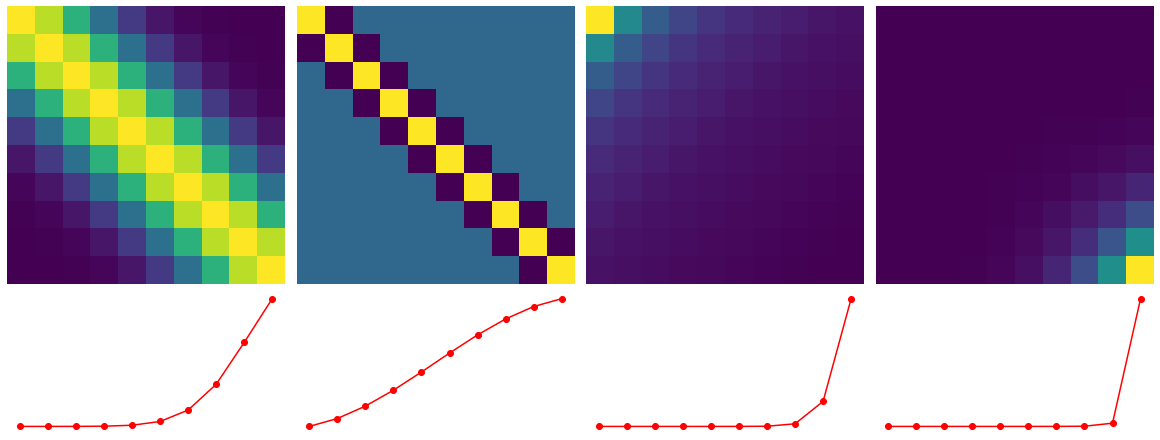

In [7]:
n = 10
gaussian = generate_psd(gaussian_kernel, n=n, s=3)
laplace = generate_psd(laplace_kernel, n=n)
hilbert = generate_psd(hilbert_kernel, n=n)
pascal = generate_psd(pascal_kernel, n=n)
fig = make_plot([gaussian, laplace, hilbert, pascal], fig=None)

Wall time: 7.84 s


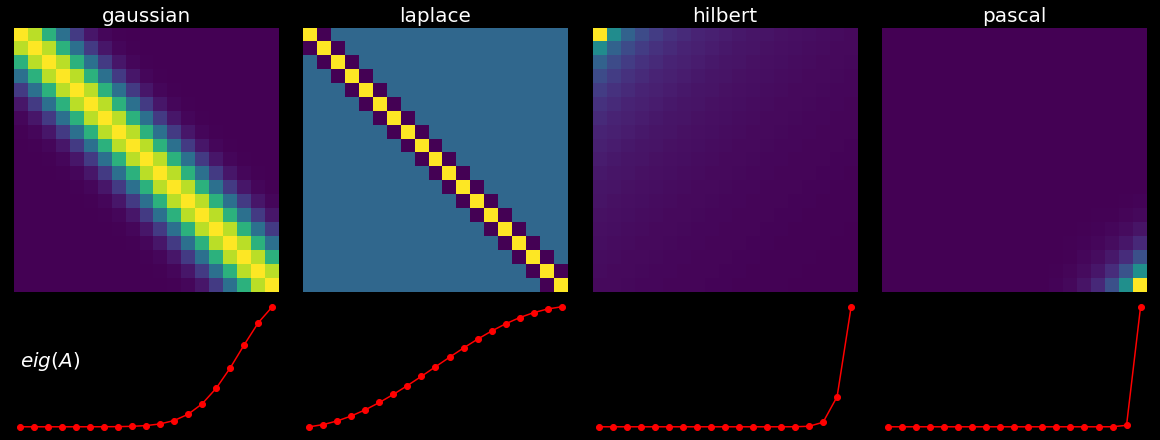

In [8]:
%%time
with plt.style.context("dark_background"):
    fig = generate_figure(4, width=4)
    ax = fig.get_axes()[1]
    ax.text(0, np.mean(ax.get_ylim()), "$eig(A)$", fontsize=20)
    for i, title in enumerate([
        "gaussian", "laplace",
        "hilbert", "pascal"
    ]):
        fig.get_axes()[i*2].set_title(title, fontsize=20)

    video_file = "psd_multiple.mp4"
    moviewriter = FFMpegFileWriter(fps=10)
    with moviewriter.saving(fig, video_file, dpi=100):
        for n in range(2, 20, 1):
            gaussian = generate_psd(gaussian_kernel, n=n, s=3)
            laplace = generate_psd(laplace_kernel, n=n)
            hilbert = generate_psd(hilbert_kernel, n=n)
            pascal = generate_psd(pascal_kernel, n=n)
            make_plot([gaussian, laplace, hilbert, pascal], fig=fig)

            ax = fig.get_axes()[1]
            ax.text(0, np.mean(ax.get_ylim()), "$eig(A)$", fontsize=20)
            for i, title in enumerate([
                "gaussian", "laplace",
                "hilbert", "pascal"
            ]):
                fig.get_axes()[i*2].set_title(title, fontsize=20)

            moviewriter.grab_frame()

In [9]:
HTML(f"""<video controls width="100%">
  <source src="{video_file}" type="video/mp4">
</video>""")